In [10]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime


In [11]:
# Lista de criptomoedas que usaremos no projeto
coin_list = [
    "bitcoin", "ethereum", "solana", "cardano", "ripple", "polkadot", "pendle", "fartcoin",
    "dogecoin", "litecoin", "chainlink", "stellar", "vechain", "tron", "monero", "tezos",
    "cosmos"
]

coin_list


['bitcoin',
 'ethereum',
 'solana',
 'cardano',
 'ripple',
 'polkadot',
 'pendle',
 'fartcoin',
 'dogecoin',
 'litecoin',
 'chainlink',
 'stellar',
 'vechain',
 'tron',
 'monero',
 'tezos',
 'cosmos']

In [12]:
def fetch_price_history_coin_gecko(coin_id, days=120):
    """
    Função para coletar dados de uma criptomoeda via API CoinGecko.

    Retorna:
      - timestamp
      - price
      - volume
      - market_cap
    """

    url = f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
    params = {'vs_currency': 'usd', 'days': days}

    r = requests.get(url, params=params)
    
    if r.status_code != 200:
        raise Exception(f"Erro ao buscar {coin_id}: {r.text}")

    data = r.json()

    df = pd.DataFrame({
        'timestamp': [p[0] for p in data['prices']],
        'price': [p[1] for p in data['prices']],
        'volume': [v[1] for v in data['total_volumes']],
        'market_cap': [m[1] for m in data['market_caps']]
    })

    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['coin'] = coin_id

    return df


In [13]:
all_data = []

for coin in coin_list:
    print(f"Baixando dados de {coin}...")
    df = fetch_price_history_coin_gecko(coin, days=120)
    all_data.append(df)

print("\nColeta finalizada!")


Baixando dados de bitcoin...
Baixando dados de ethereum...
Baixando dados de solana...
Baixando dados de cardano...
Baixando dados de ripple...
Baixando dados de polkadot...
Baixando dados de pendle...
Baixando dados de fartcoin...
Baixando dados de dogecoin...
Baixando dados de litecoin...
Baixando dados de chainlink...
Baixando dados de stellar...
Baixando dados de vechain...
Baixando dados de tron...
Baixando dados de monero...
Baixando dados de tezos...
Baixando dados de cosmos...

Coleta finalizada!


In [14]:
price_history = pd.concat(all_data, ignore_index=True)
price_history.head()


,timestamp,price,volume,market_cap,coin
0,2025-08-02,113234.605134,6.579468e+10,2.253610e+12,bitcoin
1,2025-08-03,112554.902322,3.354344e+10,2.240414e+12,bitcoin
2,2025-08-04,114199.109665,2.468927e+10,2.272802e+12,bitcoin
3,2025-08-05,115138.686131,3.248802e+10,2.292395e+12,bitcoin
4,2025-08-06,114128.354089,3.731621e+10,2.271583e+12,bitcoin


In [15]:
price_history['coin'].value_counts()


coin
bitcoin      121
ethereum     121
solana       121
cardano      121
ripple       121
polkadot     121
pendle       121
fartcoin     121
dogecoin     121
litecoin     121
chainlink    121
stellar      121
vechain      121
tron         121
monero       121
tezos        121
cosmos       121
Name: count, dtype: int64

In [16]:
# Salvar o arquivo bruto dentro da pasta /data/raw/
output_path = "../data/raw/prices_raw.csv"

price_history.to_csv(output_path, index=False)

print("Arquivo salvo em:", output_path)


Arquivo salvo em: ../data/raw/prices_raw.csv


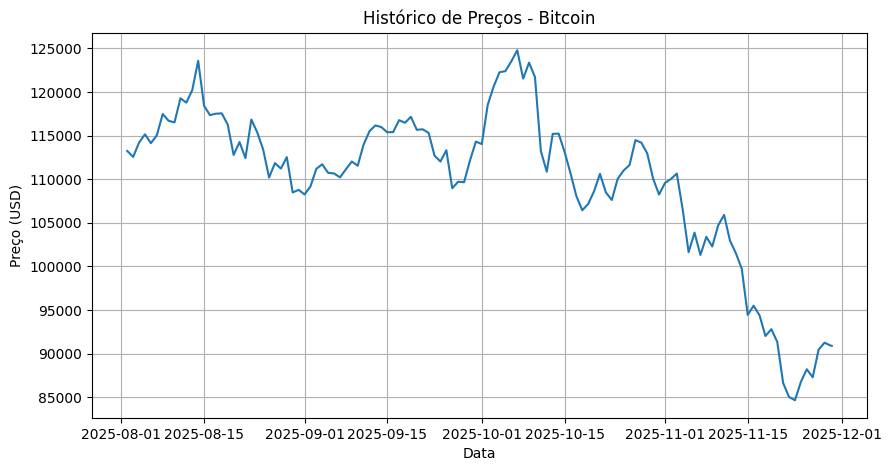

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# plotar o preço do Bitcoin como exemplo
btc = price_history[price_history['coin'] == 'bitcoin']

plt.plot(btc['timestamp'], btc['price'])
plt.title("Histórico de Preços - Bitcoin")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.grid(True)
plt.show()
